## Introduction to APIs and JSONs

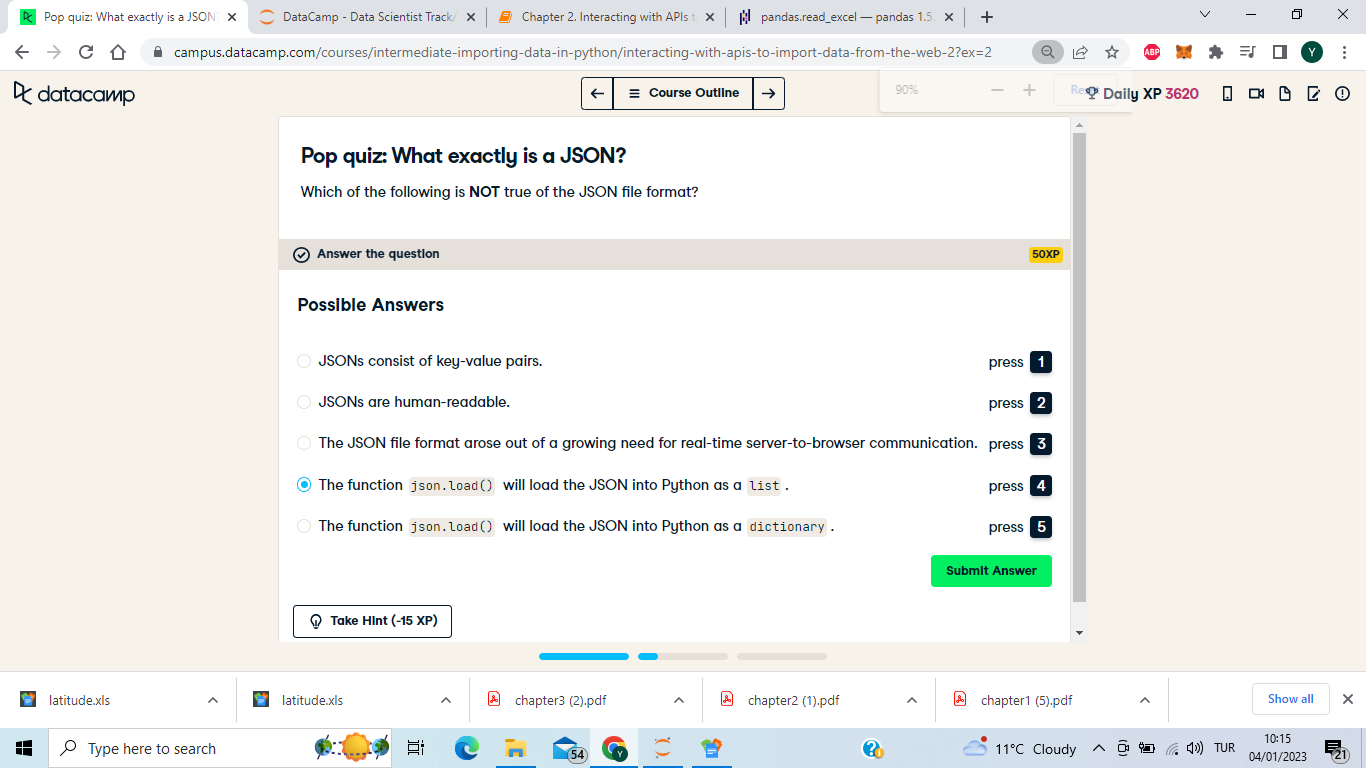

#### Loading and exploring a JSON
Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. Here, you'll load the JSON 'a_movie.json' into the variable json_data, which will be a dictionary. You'll then explore the JSON contents by printing the key-value pairs of json_data to the shell.

In [2]:
import json

# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

FileNotFoundError: [Errno 2] No such file or directory: 'a_movie.json'

## APIs and interacting with the world wide web


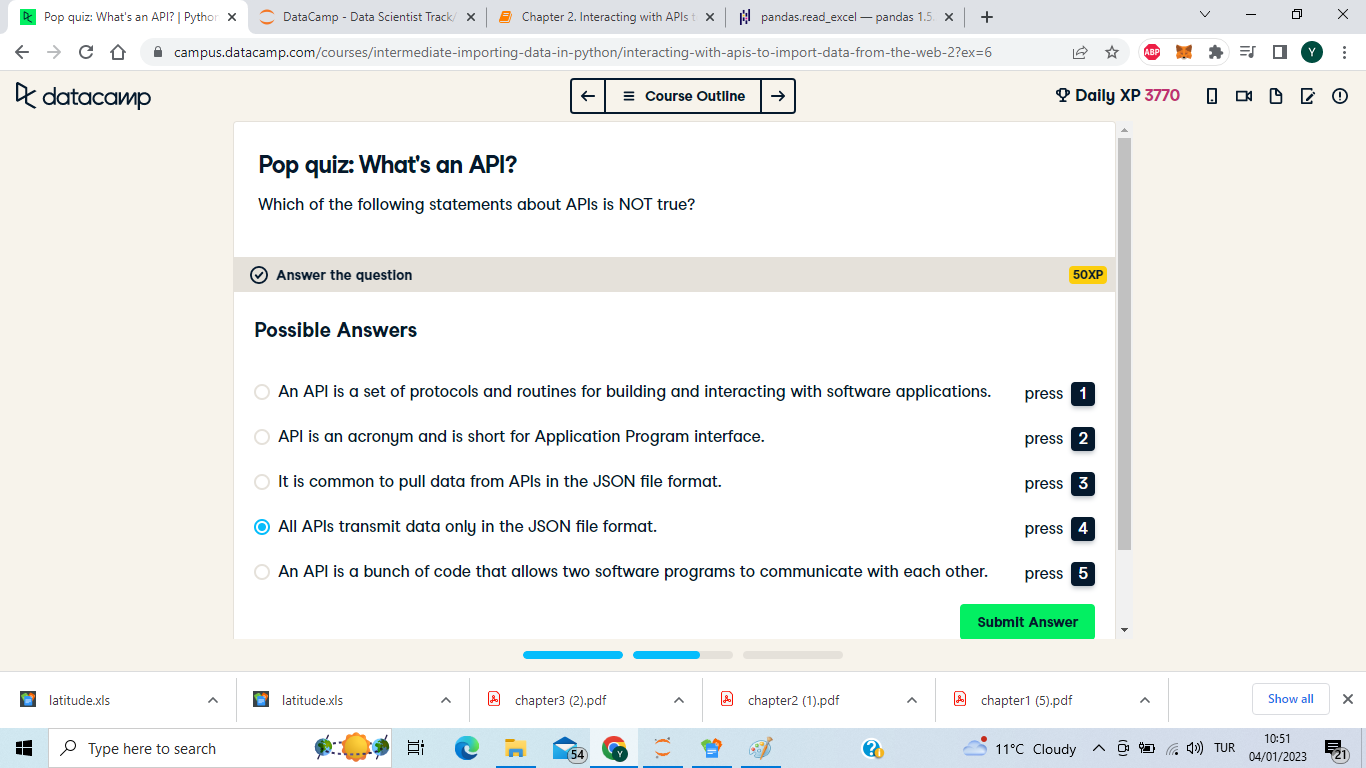

#### API requests
Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that, in the video, to query the API about the movie Hackers, Hugo's query string was 'http://www.omdbapi.com/?t=hackers' and had a single argument t=hackers.

Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: apikey=72bc447a.

In [4]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)


{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin, Ben Mezrich","Actors":"Jesse Eisenberg, Andrew Garfield, Justin Timberlake","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"United States","Awards":"Won 3 Oscars. 173 wins & 186 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.8","imdbVotes":"705,941","imdbID":"tt1285016","Type":"movie","DV

#### JSON–from the web to Python(Convert json to dict)
Wow, congrats! You've just queried your first API programmatically in Python and printed the text of the response to the shell. However, as you know, your response is actually a JSON, so you can do one step better and decode the JSON. You can then print the key-value pairs of the resulting dictionary. That's what you're going to do now!

In [20]:
# Import package
import pandas as pd
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

print("\n")
pd.DataFrame(json_data)

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin, Ben Mezrich
Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  United States
Awards:  Won 3 Oscars. 173 wins & 186 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.8
imdbVotes:  705,941
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOffice:  $

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Social Network,2010,PG-13,01 Oct 2010,120 min,"Biography, Drama",David Fincher,"Aaron Sorkin, Ben Mezrich","Jesse Eisenberg, Andrew Garfield, Justin Timbe...",As Harvard student Mark Zuckerberg creates the...,...,95,7.8,"705,941",tt1285016,movie,11 Jan 2011,"$96,962,694",N/A,N/A,True
1,The Social Network,2010,PG-13,01 Oct 2010,120 min,"Biography, Drama",David Fincher,"Aaron Sorkin, Ben Mezrich","Jesse Eisenberg, Andrew Garfield, Justin Timbe...",As Harvard student Mark Zuckerberg creates the...,...,95,7.8,"705,941",tt1285016,movie,11 Jan 2011,"$96,962,694",N/A,N/A,True
2,The Social Network,2010,PG-13,01 Oct 2010,120 min,"Biography, Drama",David Fincher,"Aaron Sorkin, Ben Mezrich","Jesse Eisenberg, Andrew Garfield, Justin Timbe...",As Harvard student Mark Zuckerberg creates the...,...,95,7.8,"705,941",tt1285016,movie,11 Jan 2011,"$96,962,694",N/A,N/A,True


#### Checking out the Wikipedia API
You're doing so well and having so much fun that we're going to throw one more API at you: the Wikipedia API (documented here). You'll figure out how to find and extract information from the Wikipedia page for Pizza. What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

The URL that requests the relevant query from the Wikipedia API is

https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza

In [21]:
# Import package
import requests

# Assign URL to variable: url
url = "https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1033289096">
<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="it-Latn-fonipa">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nap-Latn-fonipa">[ˈpittsə]</span>) is a dish of  Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as various types of sausage, anchovies, mushrooms, onions, olives, vegetables, meat, ham, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in a restaurant is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, ho